<a href="https://colab.research.google.com/github/dngdat/AI/blob/main/w4_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Đặng Thành Đạt - 20146487

Lớp sáng thứ 5 tiết 1-4

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=363c4ce225848439a8c893022752bb26f07713dbb713cfb1cabaf87b4aeea215
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz 

x = np.arange(11)
mfx = fuzz.trimf(x, [0, 5, 10]) 
print('x=', x)
print('mfx=', mfx)

x= [ 0  1  2  3  4  5  6  7  8  9 10]
mfx= [0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]


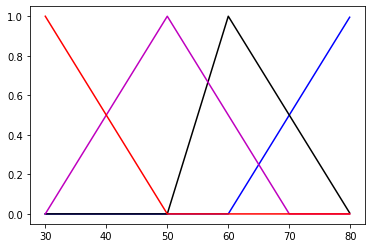

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt 

x = np.arange(30, 80, 0.1)
slow = fuzz.trimf(x, [30, 30, 50])
medium = fuzz.trimf(x, [30, 50, 70])
medium_fast = fuzz.trimf(x, [50, 60, 80])
full_speed = fuzz.trimf(x, [60, 80, 80])
plt.figure()
plt.plot(x, full_speed, 'b', linewidth = 1.5, label = 'Full Speed')
plt.plot(x, medium_fast, 'k', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x, medium, 'm', linewidth = 1.5, label = 'Medium Powered')
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')

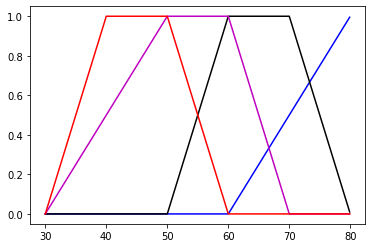

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt 

x = np.arange(30, 80, 0.1)
slow = fuzz.trapmf(x, [30, 40, 50, 60])
medium = fuzz.trapmf(x, [30, 50, 60, 70])
medium_fast = fuzz.trapmf(x, [50, 60, 70, 80])
full_speed = fuzz.trapmf(x, [60, 80, 80, 80])
plt.figure()
plt.plot(x, full_speed, 'b', linewidth = 1.5, label = 'Full Speed')
plt.plot(x, medium_fast, 'k', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x, medium, 'm', linewidth = 1.5, label = 'Medium Powered')
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')

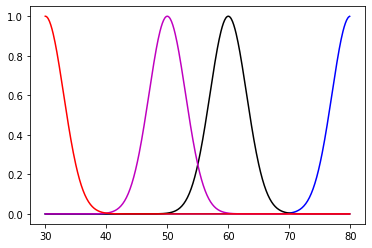

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt 

x = np.arange(30, 80, 0.1)
slow = fuzz.gaussmf(x, 30, 3)
medium = fuzz.gaussmf(x, 50, 3)
medium_fast = fuzz.gaussmf(x, 60, 3)
full_speed = fuzz.gaussmf(x, 80, 3)
plt.figure()
plt.plot(x, full_speed, 'b', linewidth = 1.5, label = 'Full Speed')
plt.plot(x, medium_fast, 'k', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x, medium, 'm', linewidth = 1.5, label = 'Medium Powered')
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')

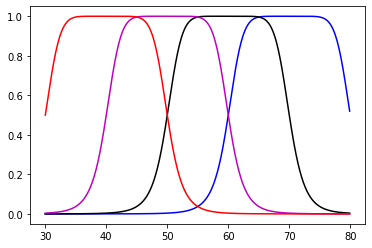

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt 

x = np.arange(30, 80, 0.1)
slow = fuzz.gbellmf(x, 10, 4, 40)
medium = fuzz.gbellmf(x, 10, 4, 50)
medium_fast = fuzz.gbellmf(x, 10, 4, 60)
full_speed = fuzz.gbellmf(x, 10, 4, 70)
plt.figure()
plt.plot(x, full_speed, 'b', linewidth = 1.5, label = 'Full Speed')
plt.plot(x, medium_fast, 'k', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x, medium, 'm', linewidth = 1.5, label = 'Medium Powered')
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')

25.515706032513773


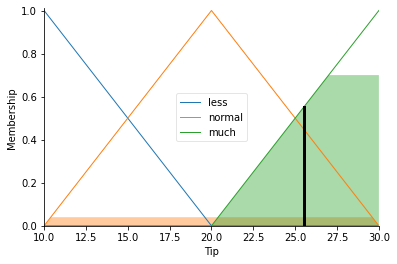

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

food = ctrl.Antecedent(np.arange(0, 11, 1), 'Food') 
service = ctrl.Antecedent(np.arange(0, 11, 1), 'Service')
tip = ctrl.Consequent(np.arange(10, 31, 1), 'Tip') 

food['poor'] = fuzz.trimf(food.universe, [0, 0, 5])
food['average'] = fuzz.trimf(food.universe, [0, 5, 10])
food['good'] = fuzz.trimf(food.universe, [5, 10, 10])

service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

tip['less'] = fuzz.trimf(tip.universe, [10, 10, 20])
tip['normal'] = fuzz.trimf(tip.universe, [10, 20, 30])
tip['much'] = fuzz.trimf(tip.universe, [20, 30, 30])

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['normal'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9]) 
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food'] = 6.5  
tipping.input['Service'] = 9.8

tipping.compute()
print(tipping.output['Tip'])
tip.view(sim = tipping)

Powering of cooking rice 

75.00000000000003


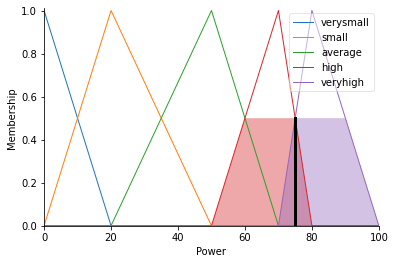

In [18]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

time = ctrl.Antecedent(np.arange(10, 181, 1), 'Time') 
rice = ctrl.Antecedent(np.arange(200, 12000, 100), 'Rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'Power') 

time['veryfast'] = fuzz.trimf(time.universe, [10, 15, 20])
time['fast'] = fuzz.trimf(time.universe, [15, 20, 40])
time['average'] = fuzz.trimf(time.universe, [20, 40, 80])
time['slow'] = fuzz.trimf(time.universe, [40, 80, 120])
time['veryslow'] = fuzz.trimf(time.universe, [80, 120, 180])

rice['veryless'] = fuzz.trimf(rice.universe, [200, 300, 400])
rice['less'] = fuzz.trimf(rice.universe, [300, 400, 1000])
rice['average'] = fuzz.trimf(rice.universe, [400, 1000, 3000])
rice['much'] = fuzz.trimf(rice.universe, [1000, 3000, 6000])
rice['verymuch'] = fuzz.trimf(rice.universe, [3000, 6000, 11000])

power['verysmall'] = fuzz.trimf(power.universe, [0, 0, 20])
power['small'] = fuzz.trimf(power.universe, [0, 20, 50])
power['average'] = fuzz.trimf(power.universe, [20, 50, 70])
power['high'] = fuzz.trimf(power.universe, [50, 70, 80])
power['veryhigh'] = fuzz.trimf(power.universe, [70, 80, 100])

rule1 = ctrl.Rule(time['veryfast'] & rice['veryless'], power['verysmall'])
rule2 = ctrl.Rule(time['veryfast'] & rice['less'], power['small'])
rule3 = ctrl.Rule(time['veryfast'] & rice['average'], power['average'])
rule4 = ctrl.Rule(time['veryfast'] & rice['much'], power['high'])
rule5 = ctrl.Rule(time['veryfast'] & rice['verymuch'], power['veryhigh'])

rule6 = ctrl.Rule(time['fast'] & rice['veryless'], power['verysmall'])
rule7 = ctrl.Rule(time['fast'] & rice['less'], power['small'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['average'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule10 = ctrl.Rule(time['fast'] & rice['verymuch'], power['veryhigh'])

rule11 = ctrl.Rule(time['average'] & rice['veryless'], power['small'])
rule12 = ctrl.Rule(time['average'] & rice['less'], power['small'])
rule13 = ctrl.Rule(time['average'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['average'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['average'] & rice['verymuch'], power['veryhigh'])

rule16 = ctrl.Rule(time['slow'] & rice['veryless'], power['average'])
rule17 = ctrl.Rule(time['slow'] & rice['less'], power['high'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['high'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['veryhigh'])
rule20 = ctrl.Rule(time['slow'] & rice['verymuch'], power['veryhigh'])

rule21 = ctrl.Rule(time['veryslow'] & rice['veryless'], power['average'])
rule22 = ctrl.Rule(time['veryslow'] & rice['less'], power['high'])
rule23 = ctrl.Rule(time['veryslow'] & rice['average'], power['high'])
rule24 = ctrl.Rule(time['veryslow'] & rice['much'], power['veryhigh'])
rule25 = ctrl.Rule(time['veryslow'] & rice['verymuch'], power['veryhigh'])

powering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13,
                                   rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['Time'] = 90  
powering.input['Rice'] = 2000

powering.compute()
print(powering.output['Power'])
power.view(sim = powering)

ProtFIS

The variation of proteinuria is evaluated by loading in input two parameters: glycaemia and the blood level of the m‐Tor inhibitor.

Based on the above inclusion and exclusion criteria, 63 patients were evaluated, and they are characterized by

• mean proteinuria of 401.78 mg/24 h (physiological range of proteinuria: 100‐4000 mg/24 h) with standard deviation of 424.19 mg/24 h;

• average normalized sample: 0.13 mg/24 h with standard deviation 0.14 mg/24 h;

• average age: 49 years;

• number of patients with diabetes risk: 12.

Associated membership functions to each of the input‐output variables are used

For the glycaemia input variable, the following threshold values are used (reference values used by physicians): normal for values between 70 and 99 mg/dL; impaired for values between 100 and 125 mg/dL; and diabetes for values greater than 126 mg/dL. Starting from these data, three fuzzy sets are named in order good, alarm, and danger.

For blood level of the Sirolimus (Rapamune) input variable, the fuzzy sets are identified on the information provided by European Medicines Agency,50 according to this agency, and with the medical support, this range is split in alarm down (0‐5 ng/mL), suff (4‐7 ng/mL), good (6‐12 ng/mL), alarm up (11‐14 ng/mL), and danger (13‐20 ng/mL). 

For the proteinuria output variable, the following threshold values are used (reference values used by physicians): physiological proteinuria (150 mg/24 h); light proteinuria (150‐500 mg/24 h); moderate proteinuria (500‐1000 mg/24 h); severe proteinuria (1000‐3000 mg/24 h); and nephrotic proteinuria (>3000 mg/24 h). The five trapezoidal and triangular membership functions coupled with these values are in order: good, sufficient, alterate, alarm, and danger.

A central point in FIS implementation consists in determining the inference rules. These are defined based on a set trial and of the clinical opinion that is fundamental in defining the basis of system knowledge. The same weight has been associated with all the rules, ie, 1.

The inference rules used in the system are shown in Table 1.
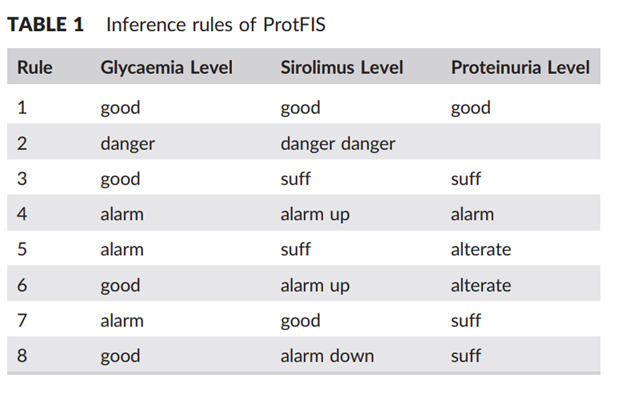


324.3593073593084
proteinuria level output: 324.3593073593084 mg/24h -> suff


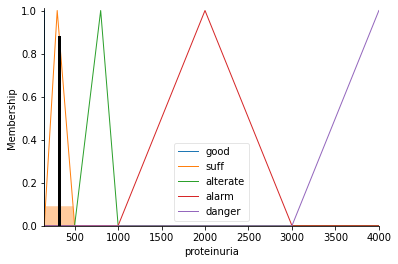

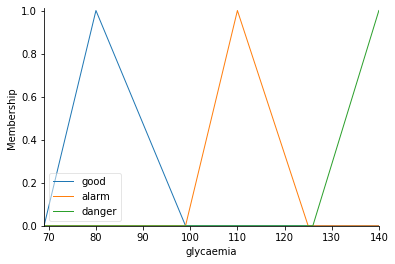

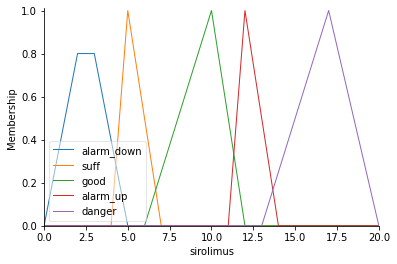

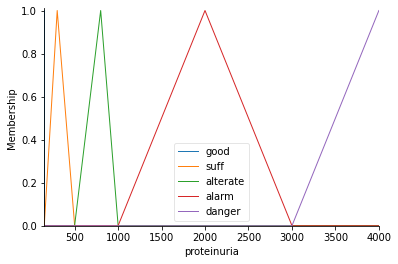

In [22]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

glycaemia = ctrl.Antecedent(np.arange(69, 141, 1), 'glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0, 21, 1), 'sirolimus') 
proteinuria = ctrl.Consequent(np.arange(149, 4001, 1), 'proteinuria') 

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [69, 80, 99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [99, 110, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [126, 140, 141])

sirolimus['alarm_down'] = fuzz.trimf(sirolimus.universe, [0, 2.5, 5])
sirolimus['suff'] = fuzz.trimf(sirolimus.universe, [4, 5, 7])
sirolimus['good'] = fuzz.trimf(sirolimus.universe, [6, 10, 12])
sirolimus['alarm_up'] = fuzz.trimf(sirolimus.universe, [11, 12, 14])
sirolimus['danger'] = fuzz.trimf(sirolimus.universe, [13, 17, 20])

proteinuria['good'] = fuzz.trimf(proteinuria.universe, [150, 150, 150])
proteinuria['suff'] = fuzz.trimf(proteinuria.universe, [151, 300, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe, [500, 800, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe, [1000, 2000, 3000])
proteinuria['danger'] = fuzz.trimf(proteinuria.universe, [3000, 4000, 5000])

dir_protein = {'good': [150, 151], 'suff': [151, 500], 'alterate': [500, 1000], 'alarm': [1001, 3000], 'danger':[3000, 5000]}

rule1 = ctrl.Rule(glycaemia['good'] & sirolimus['good'], proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger'] & sirolimus['danger'], proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good'] & sirolimus['suff'], proteinuria['suff'])
rule4 = ctrl.Rule(glycaemia['alarm'] & sirolimus['alarm_up'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & sirolimus['suff'], proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm_up'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm'] & sirolimus['good'], proteinuria['suff'])
rule8 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm_down'], proteinuria['suff'])

proteinuria_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
protein = ctrl.ControlSystemSimulation(proteinuria_ctrl)

protein.input['glycaemia'] = 100
protein.input['sirolimus'] = 11
protein.compute()
print(protein.output['proteinuria'])
result = protein.output['proteinuria']

for i, value in enumerate(dir_protein):
    if dir_protein[value][0] <= result < dir_protein[value][1]:
        break
    else:
        continue

print('proteinuria level output: {} mg/24h -> {}'.format(result, value))

proteinuria.view(sim = protein)

glycaemia.view()
sirolimus.view()
proteinuria.view()

ProtACE

For dosage of calcineurin inhibitor (cyclosporine) input variable, the reference drug is Neoral; also in this case, fuzzy sets are identified on the information provided by European Medicines Agency,51 implementing five fuzzy sets to better characterize the physio‐pathological behaviour of patients, highlighting the risk related to the high dosage: alarm down (0‐2 mg/kg), good (1.5‐5 mg/kg), suff (4‐11 mg/kg), alarm up (8‐15 mg/kg) and danger (12‐20 mg/kg).

GFR output is made by MDRD equation52 using creatinine serum. Usual threshold values (reference values used by physicians) are stage 1: GFR ≥ 90 mL/min; stage 2: 60 ≤ GFR < 90; stage 3: 30 ≤ GFR < 60; stage 4: 15 < GFR < 30; stage 5: GFR < 15 with five fuzzy set named in order: danger, alarm 4, alarm 3, alarm 2, and good. The inference rules (with same weight unitary) are shown in Table 2:

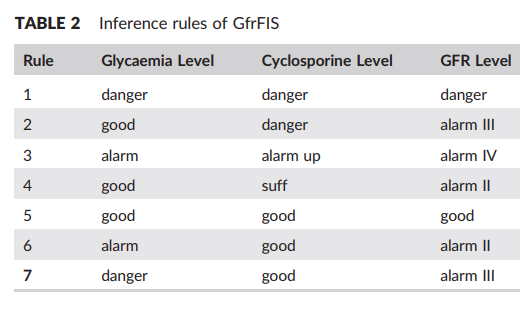

7.5223665223665215
GFR_Level output: 7.5223665223665215 mL/min -> good


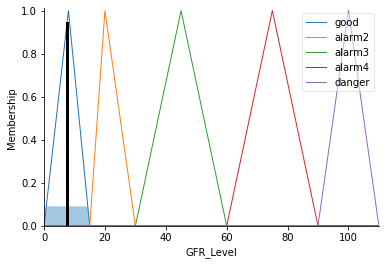

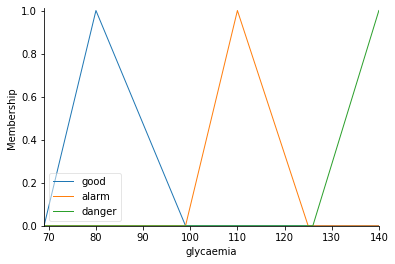

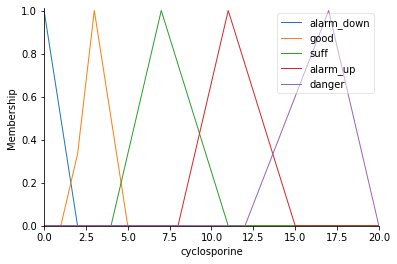

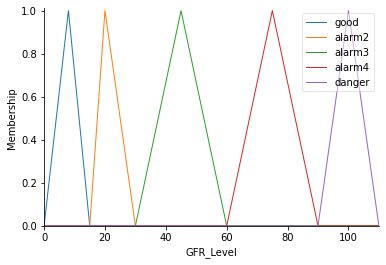

In [21]:
from networkx.algorithms.clique import graph_number_of_cliques
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

glycaemia = ctrl.Antecedent(np.arange(69, 141, 1), 'glycaemia')
cyclosporine = ctrl.Antecedent(np.arange(0, 21, 1), 'cyclosporine') 
GFR = ctrl.Consequent(np.arange(0, 111, 1), 'GFR_Level') 

glycaemia['good'] = fuzz.trimf(glycaemia.universe, [69, 80, 99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe, [99, 110, 125])
glycaemia['danger'] = fuzz.trimf(glycaemia.universe, [126, 140, 141])

cyclosporine['alarm_down'] = fuzz.trimf(cyclosporine.universe, [0, 0, 2])
cyclosporine['good'] = fuzz.trimf(cyclosporine.universe, [1.5, 3, 5])
cyclosporine['suff'] = fuzz.trimf(cyclosporine.universe, [4, 7, 11])
cyclosporine['alarm_up'] = fuzz.trimf(cyclosporine.universe, [8, 11, 15])
cyclosporine['danger'] = fuzz.trimf(cyclosporine.universe, [12, 17, 20])

GFR['good'] = fuzz.trimf(GFR.universe, [0, 8, 15])
GFR['alarm2'] = fuzz.trimf(GFR.universe, [15, 20, 30])
GFR['alarm3'] = fuzz.trimf(GFR.universe, [30, 45, 60])
GFR['alarm4'] = fuzz.trimf(GFR.universe, [60, 75, 90])
GFR['danger'] = fuzz.trimf(GFR.universe, [90, 100, 110])

dir_gfr = {'good': [0, 15], 'alarm2': [16, 30], 'alarm3': [30, 60], 'alarm4': [60, 90], 'danger':[90, 100]}
rule1 = ctrl.Rule(glycaemia['danger'] & cyclosporine['danger'], GFR['danger'])
rule2 = ctrl.Rule(glycaemia['good'] & cyclosporine['danger'], GFR['alarm3'])
rule3 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['alarm_up'], GFR['alarm4'])
rule4 = ctrl.Rule(glycaemia['good'] & cyclosporine['suff'], GFR['alarm3'])
rule5 = ctrl.Rule(glycaemia['good'] & cyclosporine['good'], GFR['good'])
rule6 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['good'], GFR['alarm2'])
rule7 = ctrl.Rule(glycaemia['danger'] & cyclosporine['good'], GFR['alarm3'])

gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
gfr = ctrl.ControlSystemSimulation(gfr_ctrl)

gfr.input['glycaemia'] = 70
gfr.input['cyclosporine'] = 4
gfr.compute()
print(gfr.output['GFR_Level'])
result = gfr.output['GFR_Level']

for i, value in enumerate(dir_gfr):
    if dir_gfr[value][0] <= result < dir_gfr[value][1]:
        break
    else:
        continue

print('GFR_Level output: {} mL/min -> {}'.format(result, value))

GFR.view(sim = gfr)
glycaemia.view()
cyclosporine.view()
GFR.view()